In [92]:
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision.models import ResNet50_Weights
import torch
from PIL import Image
from torchvision import transforms

In [134]:
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = fasterrcnn_resnet50_fpn(weights=weights, num_classes=len(weights.meta["categories"]), weights_backbone=ResNet50_Weights.DEFAULT).to(device)
model.eval()
preprocess = weights.transforms()

In [135]:
img = Image.open("test.jpeg").convert('RGB')
img_tensor_i = transforms.Compose([
    transforms.PILToTensor()
])(img)
img_tensor_f = transforms.ToTensor()(img)
prep_img = preprocess(img_tensor_f).unsqueeze_(0)
prediction = model(prep_img)[0]
threshold = 0.75
prediction['boxes'] = prediction['boxes'][prediction['scores'] > threshold]
prediction['labels'] = prediction['labels'][prediction['scores'] > threshold]
prediction['scores'] = prediction['scores'][prediction['scores'] > threshold]

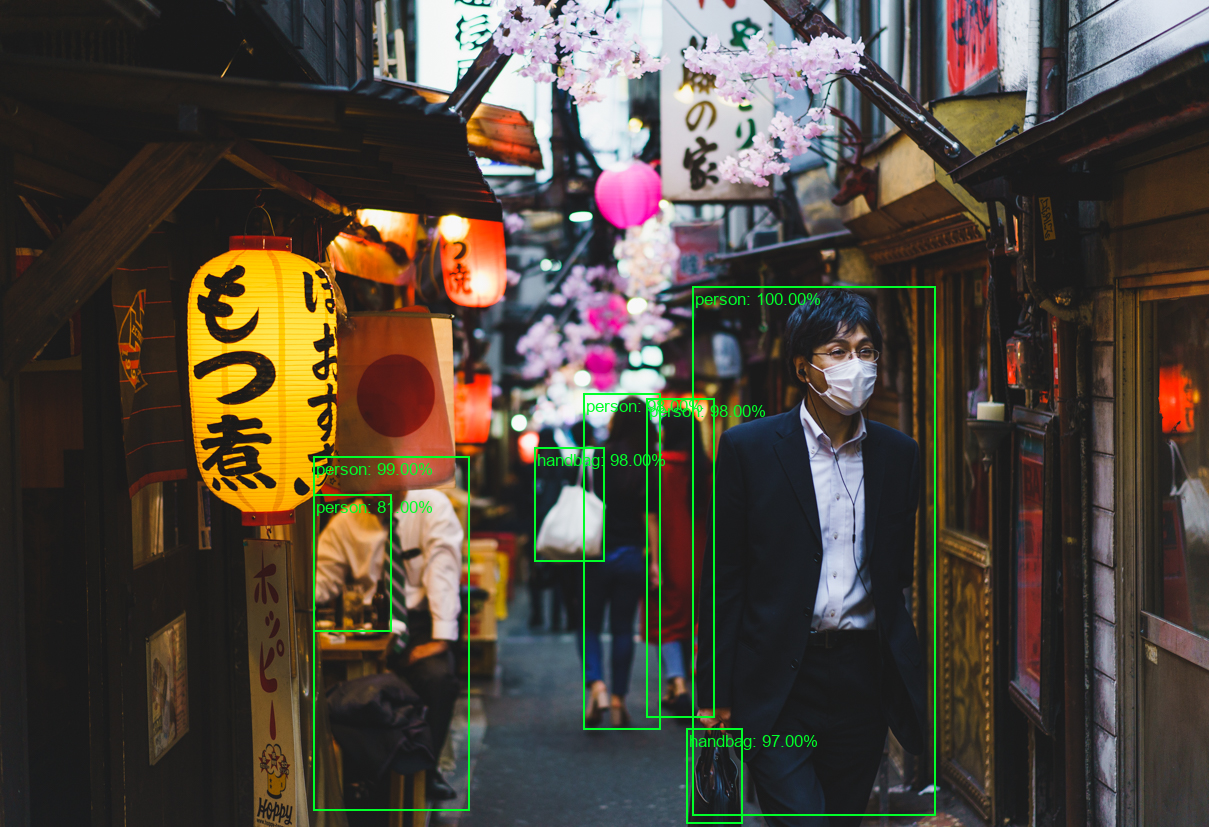

In [136]:
labels = ["{}: {:.2f}%".format(weights.meta["categories"][prediction["labels"][i]], round(float(prediction['scores'][i]) * 100, 0)) for i in range(len(prediction["labels"]))]

box = draw_bounding_boxes(image = img_tensor_i, boxes=prediction["boxes"],
                          labels=labels,
                          colors=(0, 255, 42),
                          width=2, 
                          font_size=17,
                          font='Arial')

im = to_pil_image(box.detach())
im